# Evolution of Student Issues in the Daily Pennsylvanian
## Using opinion articles from _The Daily Pennsylvanian_ to analyze how students' concerns have changed over the past several years
### Evan Bean, Ben Chan, and Sarika Rau | COMM 3130

## Introduction
### Background & Motivation
Since _The Daily Pennsylvanian_, Penn's student newspaper, began uploading opinion articles on its website - starting from a single article in 2006 and eventually beginning to upload more articles in 2009 - the site has been an invaluable resource for Penn students, faculty, and community members to learn about the issues that affect students and inspire them to speak up. 
These articles, mostly written by undergraduate student writers, can serve as an opportunity to bring awareness to issues, and often draw administrative attention to spark actual change in the Penn community. As such, our group found ourselves wondering whether we could glean information about the types of concerns that are prevalent among Penn's student population as well as the trends that present themselves over time from the archive of articles on the DP's website. By analyzing the text from these articles, we hoped to paint a broad picture of student concerns over time. The following blog post will explain the study we conducted and detail the observations and conclusions to which we came during our analysis.
### Research Questions & Hypotheses
**Research Question**: How have Penn students’ concerns changed over the past two decades?

**Hypotheses**:
* Student issues resurface in 5-year cycles
* Article topics have become increasingly diverse
* Article topics see major shifts in 2020

## Preliminary Data Analysis: Observing Broad Trends
### Setup & Load Data

In [44]:
import json
from datetime import datetime
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import statistics

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [45]:
%run final_functions.ipynb

In [46]:
corpus = json.load(open('../data/completeCorpus.json'))
print("loaded successfully")

loaded successfully


Before completing any data analysis, we first had to scrape the Daily Pennsylvanian website to collect all information on opinion articles and compile it into a JSON file, which we then cleaned up by removing photo stories and cartoons from the compilation. Within the JSON file, each entry represents an article, with information on the author, timestamp, page URL, article summary, and article body text included in each entry.
Our remaining data consists of over 3000 opinion articles from 2006 to 2022, although we will focus mainly on the years from 2011 to 2022, for reasons which become obvious upon viewing a graphical representation of the number of articles written per year.

In [5]:
years = []
months = []
for row in corpus:
    date_str = row['timestamp'][:8]
    date_obj = datetime.strptime(date_str, '%m/%d/%y')
    months.append(date_obj.month)
    years.append(date_obj.year)

In [6]:
years_counter = Counter(years)
print(sorted(years_counter.items()))

[(2006, 1), (2009, 21), (2011, 108), (2012, 241), (2013, 246), (2014, 174), (2015, 264), (2016, 287), (2017, 314), (2018, 276), (2019, 301), (2020, 326), (2021, 264), (2022, 173)]


In [7]:
mean = statistics.mean(years_counter.values())
print(mean)

214


As shown above, each year within our focus range has at least 100 opinion articles with an average of 214 articles written per year. 2022 shows a notable decrease in articles written, partially due to the year not yet being over at the time of collection.
To gain further clarity regarding the distribution of articles written, we looked at the number of articles written per month:
### Frequency Analysis

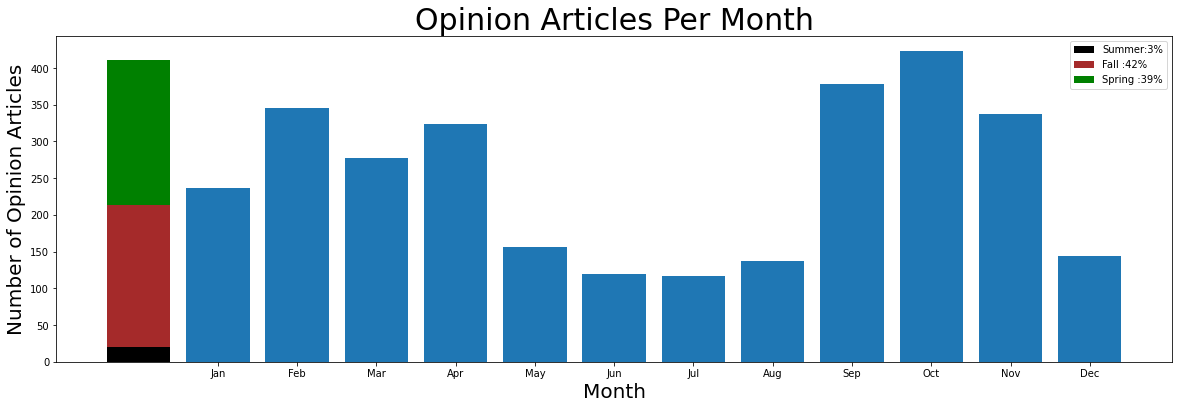

In [8]:
months_counter = Counter(months)
sort = sorted(months_counter.items())
x = [i[0] for i in sort]
y = [i[1] for i in sort]

plt.figure(figsize=(20,6))
plt.bar(x,y)
plt.xlabel('Month',size=20)
plt.ylabel('Number of Opinion Articles',size=20)
plt.xticks(ticks=x, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Opinion Articles Per Month', size=30)
springTerm=sum(y[0:4])/(sum(y))*500
fallTerm=sum(y[7:11])/(sum(y))*500
summerTerm=sum(y[5:6])/(sum(y))*500
plt.bar('All Publications',summerTerm,color='black',label='Summer:'+str(int(summerTerm/5))+'%')
plt.bar('All Publications',fallTerm,color='brown',bottom=summerTerm,label='Fall :'+str(int(fallTerm/5))+'%')
plt.bar('All Publications',springTerm,color='green',bottom=fallTerm,label='Spring :'+str(int(springTerm/5))+'%')
plt.legend()

From this visualization, we found that the majority of articles are written during the two academic semesters, with a notably smaller portion of articles being written in the months of May through August. This suggests that articles are likely to be about academic and social issues that affect students during the semester rather than year-round or during the summer, but in order to gain more detail, we decided to look more deeply at our corpus.

## Tokenization: Breaking Up the Corpus
Having finished with our baseline data observations, we moved on to tokenizing our textual data, beginning with the article summaries. Taking a look at the most common summary tokens by year:

In [ ]:
for article in corpus:
    tokenize_and_exclude_summary(article)

In [ ]:
remove_chars = '.,"()[]!;:—“'

In [ ]:
year_sort = [i[0] for i in sorted(years_counter.items())]
yearlytokensdict={}
yearlyCONTENTtokensdict={}
yearlyCONTENTbigramsdict={}
yearlyCONTENTtrigramsdict={}

total_corpus_counter = Counter()
for i in year_sort:
    yearlytokensdict[i]=[]
    yearlyCONTENTtokensdict[i]=[]
    yearlyCONTENTbigramsdict[i]= Counter()
    yearlyCONTENTtrigramsdict[i]= Counter()

In [ ]:
addl_stop = ['I', '—', 'Columnist', 'discusses', 'columnist', 'freshman', 'sophomore', 'junior', 'senior', 
             'email', 'address', 'is', 'see', '|', 'more', 'from', 'monday', 'tuesday', 'wednesday', 'thursday',
             'friday', 'saturday', 'sunday', 'sign', 'up', 'newsletter', 'for', 'daily', 'pennsylvanian', 
             'delivered', 'inbox', 'weekday', 'morning',]

stop_words = set(stopwords.words('english'))
stop_words = list(stop_words.union(addl_stop))

for article in corpus:
    year = int(article['timestamp'][6:8]) + 2000
    yearlytokensdict[year].append(article['summaryTokens']) #bins all tokens from summaries by year
    article['contentTokens'] = tokenize(article['content'], lowercase = True, strip_chars = remove_chars)
    article['contentTokens'] = remove_words(article['contentTokens'], stop_words)
    yearlyCONTENTtokensdict[year].append(article['contentTokens']) #bins all tokens from content by year
    article['bigrams'] = get_ngram_tokens(article['contentTokens'], n = 2)
    yearlyCONTENTbigramsdict[year].update(article['bigrams'])
    article['trigrams'] = get_ngram_tokens(article['contentTokens'], n = 3)
    yearlyCONTENTtrigramsdict[year].update(article['trigrams'])
    total_corpus_counter.update(article['contentTokens'])

for year in yearlytokensdict:  
    filtered_tokens=[]
    for w in flatten(yearlytokensdict[year]):
        if w not in stop_words:
            filtered_tokens.append(w) #creates lists of tokens not in stopwords
    yearlytokensdict[year] = Counter(filtered_tokens)
    
for year in yearlyCONTENTtokensdict:  
    filtered_tokens=[]
    for w in flatten(yearlyCONTENTtokensdict[year]):
        if w not in stop_words:
            filtered_tokens.append(w) #creates of lists of tokens not in stopwords
    yearlyCONTENTtokensdict[year] = Counter(filtered_tokens)
    

In [ ]:
focus_years = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
for year in focus_years:
    tester=yearlytokensdict[year].most_common(50)
    testTokenDict18=[i[0] for i in tester]
    testFreq18=[i[1] for i in tester]
    plt.figure(figsize=(40,6))
    plt.xticks(rotation = 45)
    plt.bar(testTokenDict18,testFreq18)
    plt.title(year)

We find a very clear common trend across all years of article summaries referring to "Penn" and "students," indicating that the article topics fall within the scope of the Penn community, but this was as expected and provides us with no information about the topics of the articles themselves. There is also little apparent change in content between years. To find out more, we next look at the article body text tokens by year:

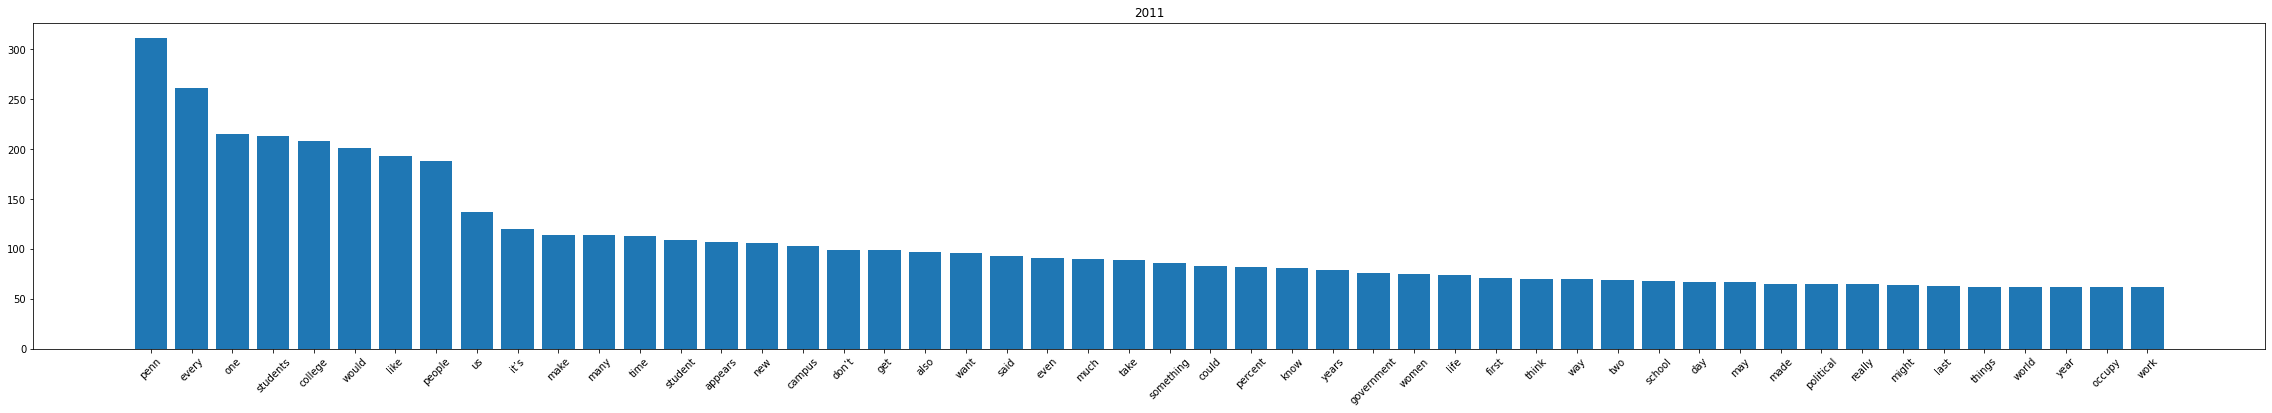

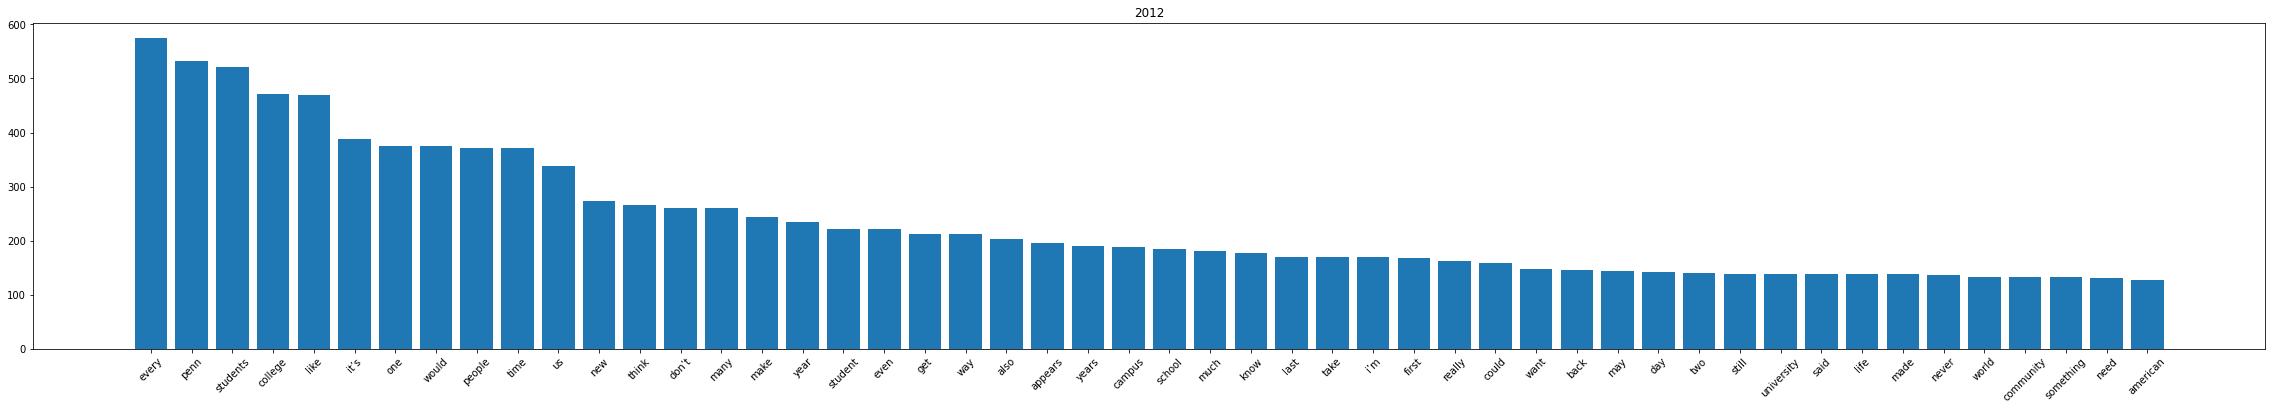

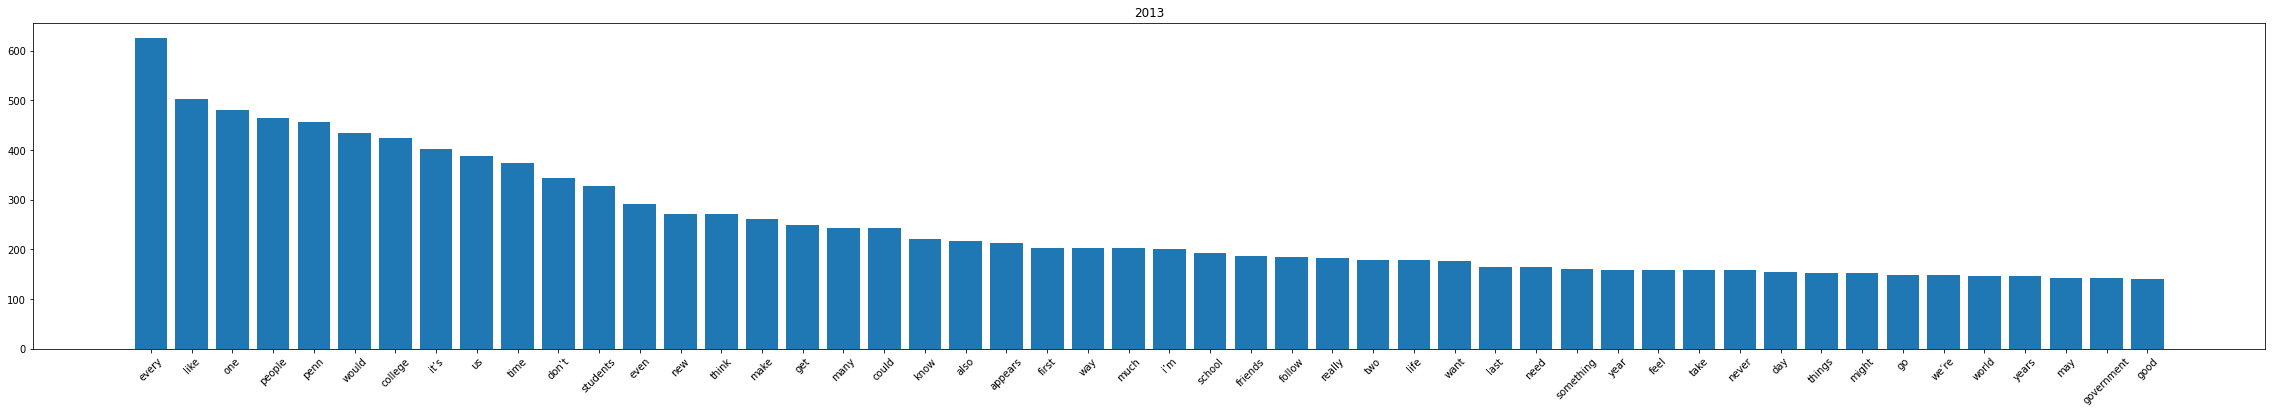

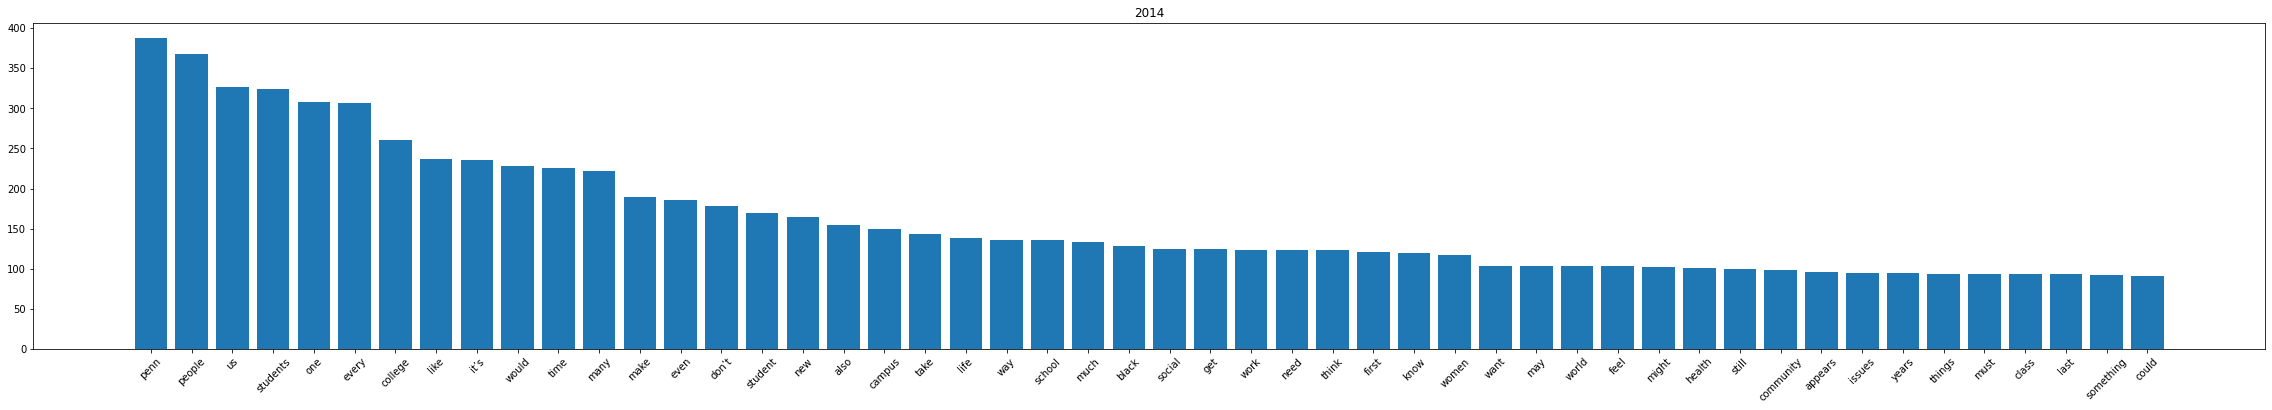

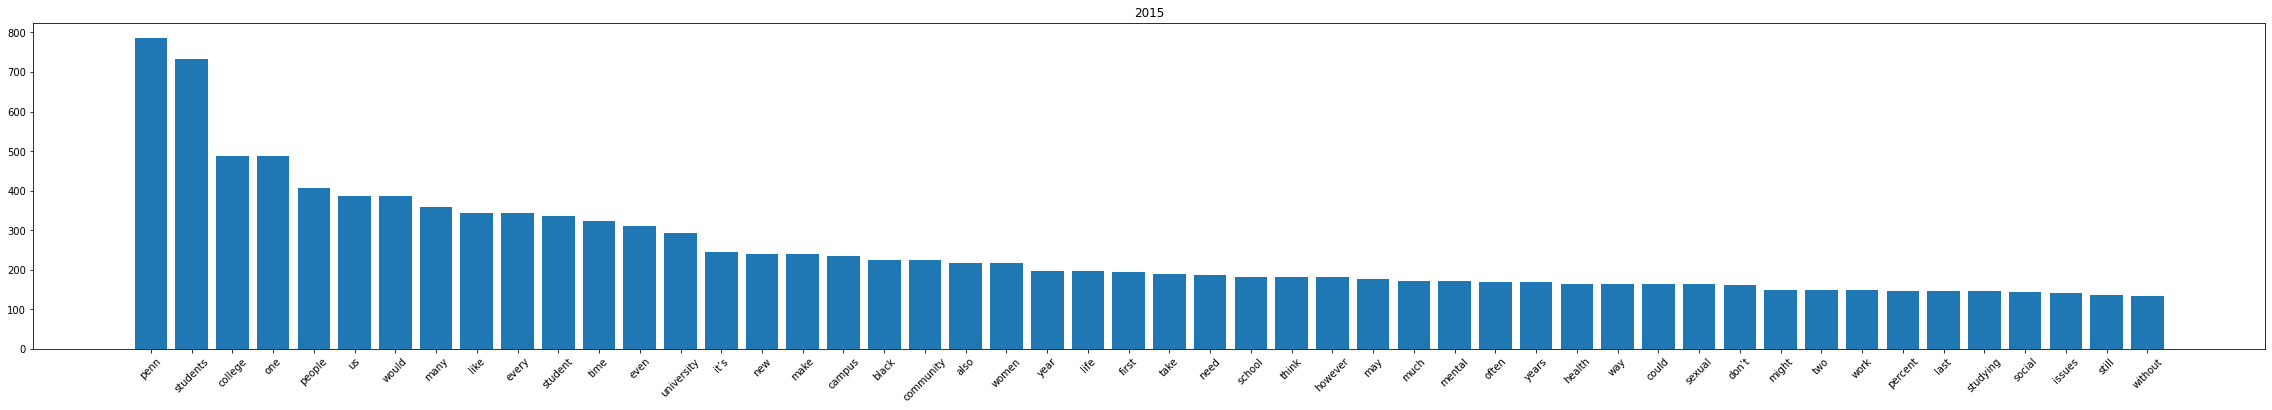

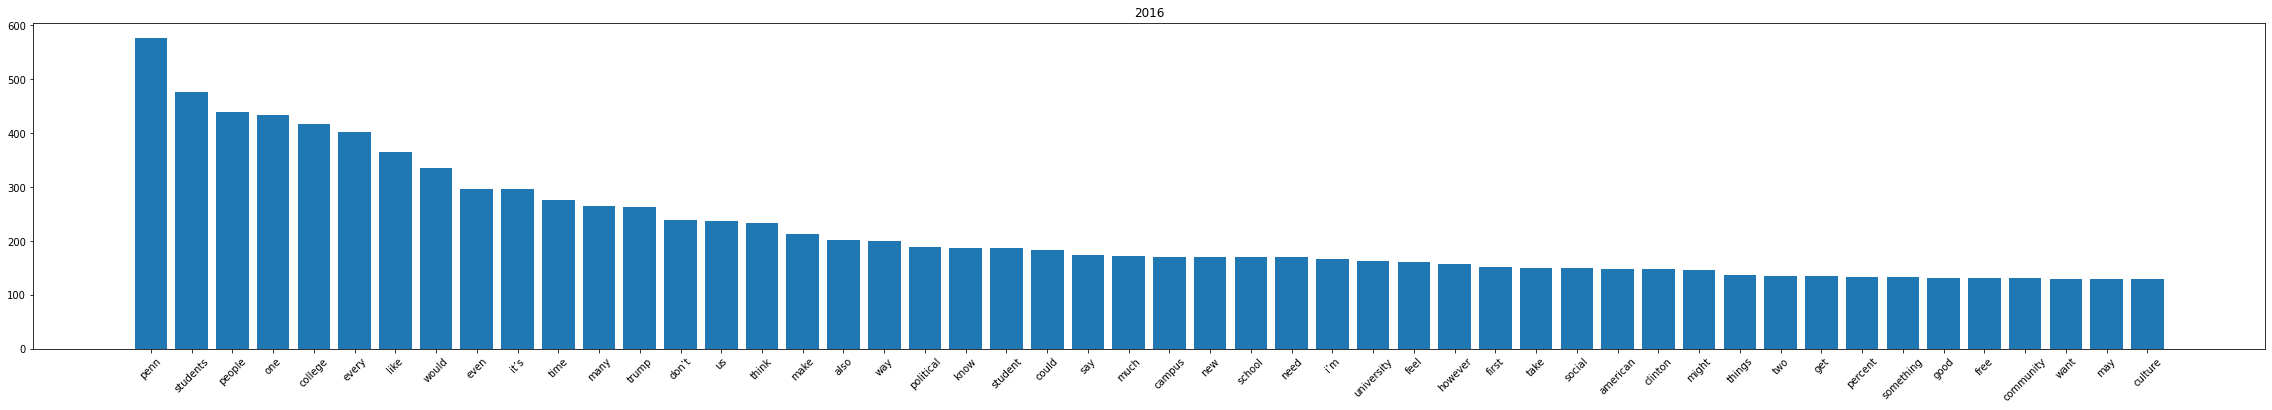

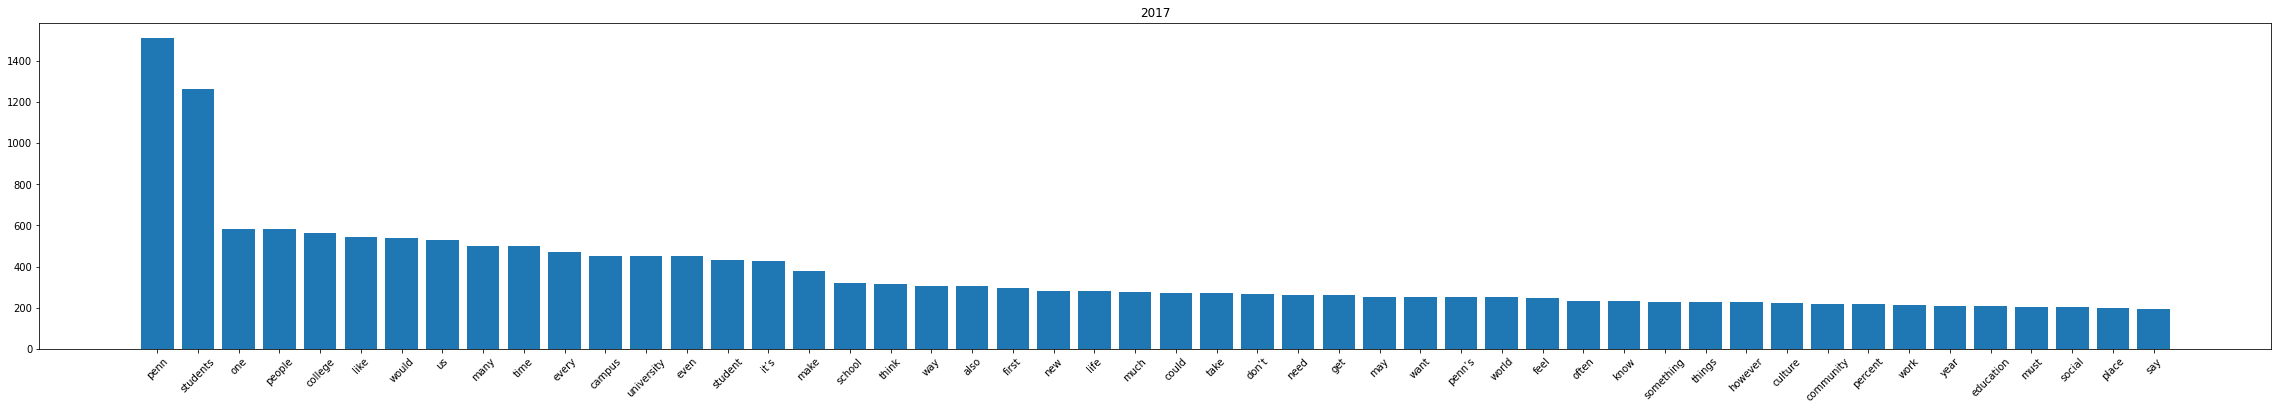

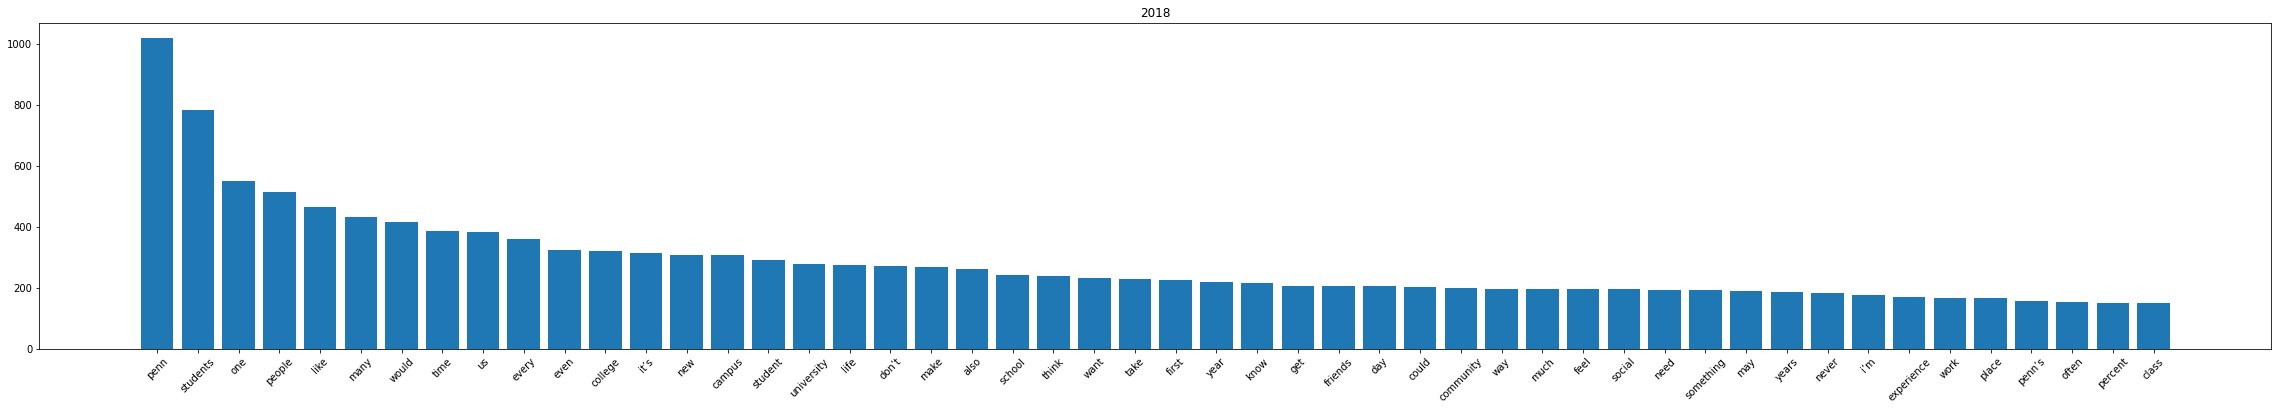

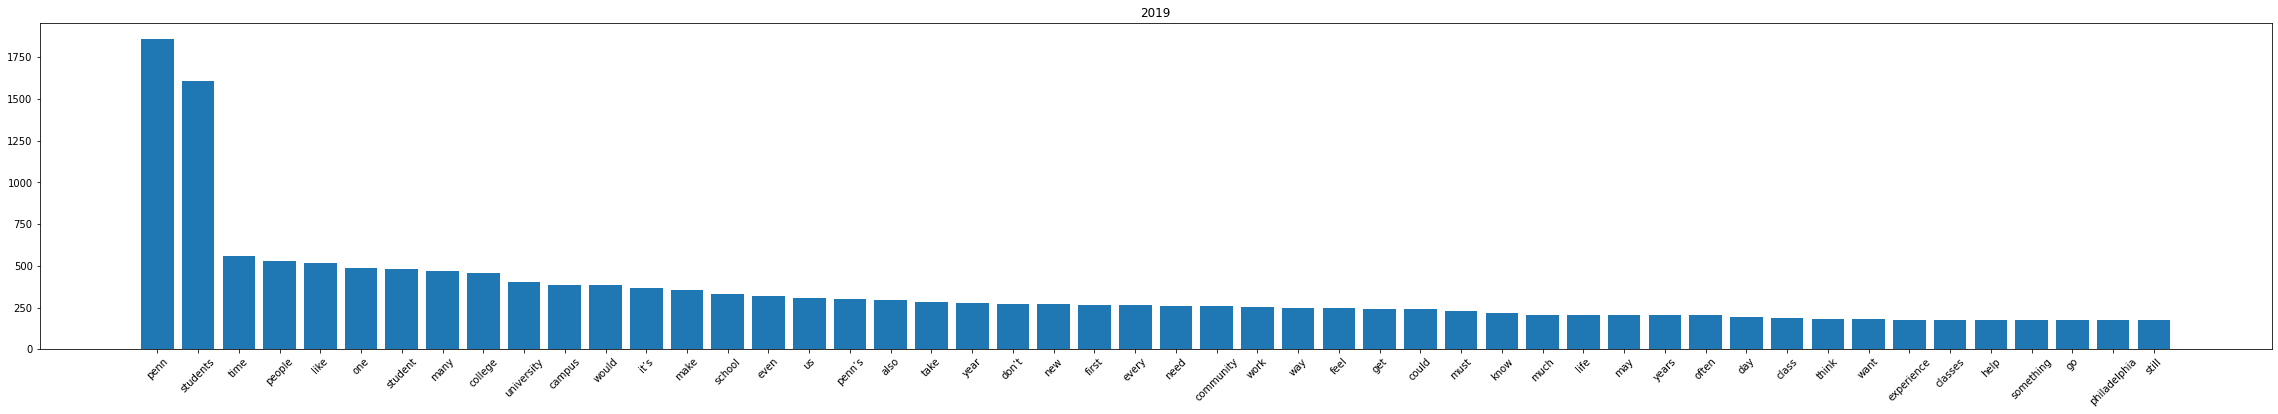

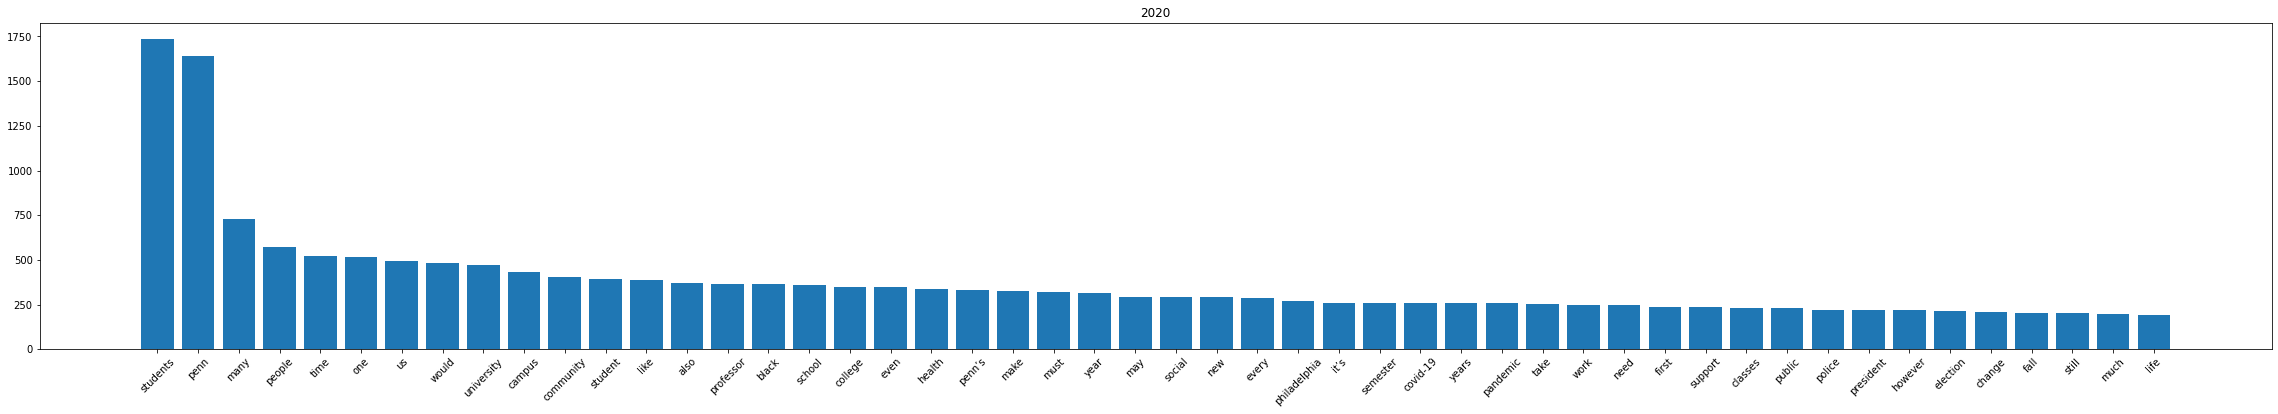

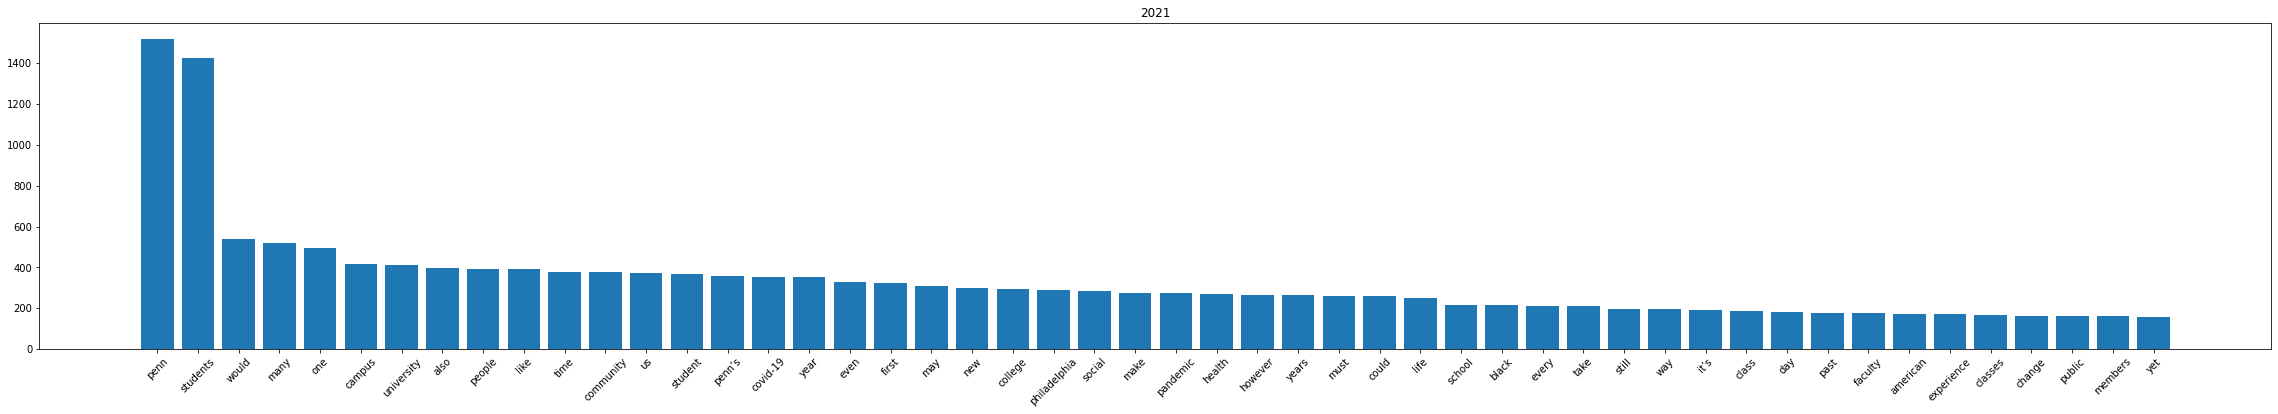

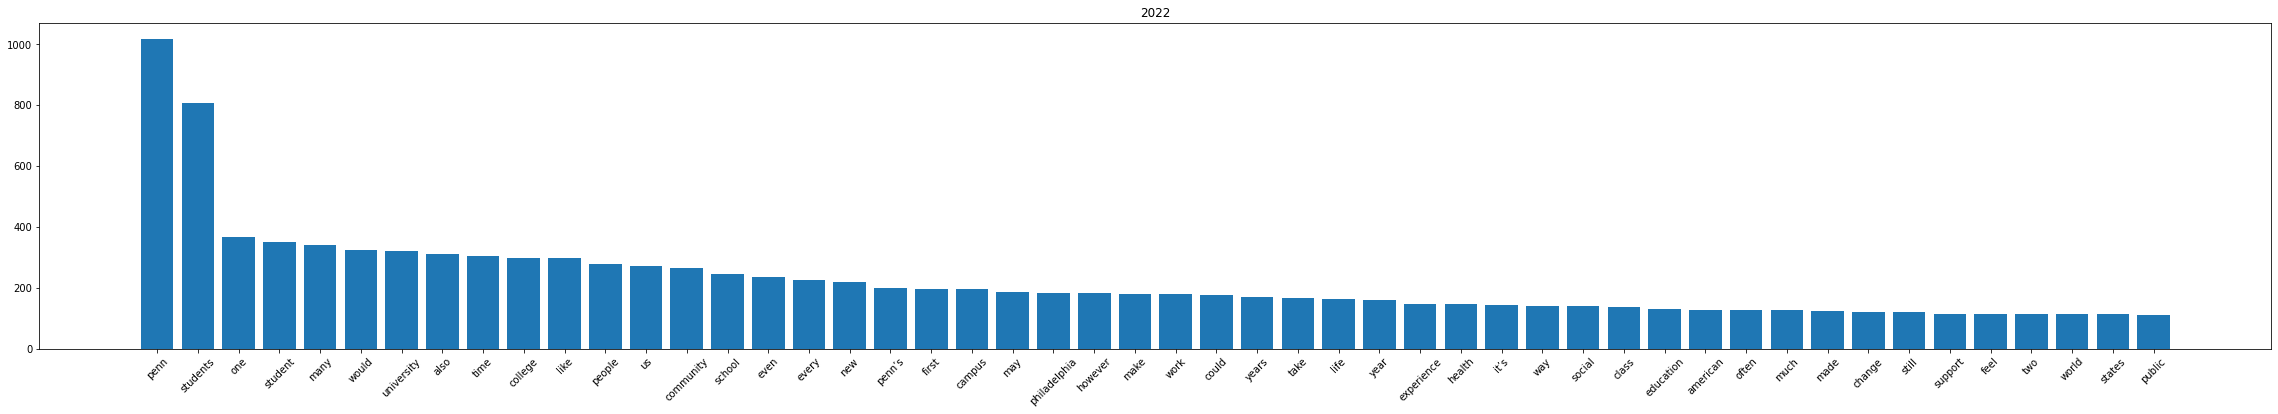

In [14]:
for year in focus_years:
    contentTester=yearlyCONTENTtokensdict[year].most_common(50)
    contentTokenDict18=[i[0] for i in contentTester]
    contentFreq18=[i[1] for i in contentTester]
    plt.figure(figsize=(40,6))
    plt.xticks(rotation = 45)
    plt.bar(contentTokenDict18,contentFreq18)
    plt.title(year)

The body text frequency charts provide us with more topical information than the summaries: we see the same prevalence of "Penn" and "students" as in the summaries, but we get more specific information when we look at the words farther down in frequency. Specifically, we find some evidence towards our hypothesis that there will be major shifts in article topics starting in 2020: we see words like "pandemic," "health," "covid-19," and other COVID-related terms begin to pop up where they previously did not exist.

## Keyness Analysis: Comparing Individual Years to Full Corpus
### Analyses on specific words
In this substep, we will gather a list of specific words to analyze across target years and perform a keyness analysis on these words in particular. Our initial hypothesis focused on 2020 and the COVID-19 pandemic (we also wanted to take a look at the 2008 financial crisis, but this is unfortunately impossible as there is no data for 2008).
We'll start with our previously defined dictionary, which has a Counter object for each year represented in the DP Opinion section. We can first perform our analysis for 2020, since this was one of our main years of interest to analyze. 2020 has a total of 20177 tokens (after having filtered out stop words from earlier):

In [ ]:
tokens_2020 = yearlyCONTENTtokensdict[2020]
len(tokens_2020)

Our next step is to write functions to compute the frequencies of key words that we want to analyze in 2020. We make a list of words with some words from 2020 to analyze in comparison to the entire corpus in general. A positive difference coefficient means that the word occurs  more frequently in 2020 than in the total corpus, and a negative difference coefficient indicates a word that occurs more frequently in the total corpus. 

Our overall pipeline here is:
1. Gather the corpora for comparison 
2. Generate a list of words for comparison between the two corpora
3. Filter words (in case a word does not occur in either corpora)
4. Calculate difference coefficient and log likelihood

The first of these analyses is demonstrated in code blocks. However, since we perform the analyses multiple times, they are also written in a function in `final_functions.ipynb` so that it is easy to perform them multiple times.

In [16]:
words_2020 = ['covid', 'health', 'pandemic', 'covid-19', 'vaccine', 'vaccines', 
              'mask', 'distancing', 'cdc', 'guidelines']
# Filter words
words_2020 = filter_words_in_corpora(tokens_2020, total_corpus_counter, words_2020)

In [ ]:
## 2020 will not have any tokens that are not in the total corpus, so all of the tokens from 2020 are common to both corpora
data_demo = []
for word in words_2020:
    #display_differences(tokens_2020, total_corpus_counter, 'the 2020 articles', 'the entire corpus', word)
    data_demo.append(freq_dictionary(tokens_2020, total_corpus_counter, '2020', 'Whole Corpus', word))

This data is most easily visualizable in a `DataFrame` object:

In [ ]:
data_frame_demo = pd.DataFrame(data_demo)
data_frame_demo

We can also perform this analysis between 2019 and 2020 to get a baseline comparison for how things have changed from before the pandemic to during the COVID lockdown:

In [ ]:
words_2020 = ['covid', 'health', 'pandemic', 'covid-19', 'vaccine', 'vaccines', 'mask', 'distancing', 'cdc', 'guidelines']
tokens_2019 = yearlyCONTENTtokensdict[2019]
word_specific_keyness_analysis(tokens_2020, tokens_2019, '2020', '2019', words_2020)

We can perform this analysis for 2020 and 2021 to see how things have changed over the course of a year:

In [20]:
words_2020 = ['covid', 'health', 'pandemic', 'covid-19', 'vaccine', 'vaccines', 'mask', 
              'distancing', 'cdc', 'guidelines']
tokens_2021 = yearlyCONTENTtokensdict[2021]
word_specific_keyness_analysis(tokens_2020, tokens_2021, '2020', '2021', words_2020)

,Word,2020 Frequency,2021 Frequency,Difference Coefficient,Log Likelihood
0,covid,8,9,-0.06,-0.104550
1,health,167,151,0.05,1.519177
2,pandemic,128,151,-0.08,-3.887782
3,covid-19,128,196,-0.21,-27.248498
4,vaccine,9,52,-0.70,-64.141217
5,vaccines,1,35,-0.94,-80.651470
6,mask,13,14,-0.04,-0.070910
7,distancing,27,11,0.42,14.513414
8,cdc,4,5,-0.11,-0.055350
9,guidelines,14,18,-0.12,-0.667977


We can also perform this analysis between 2020 (during the pandemic lockdown and remote learning) and 2022 (post-pandemic):

In [21]:
words_2020 = ['covid', 'health', 'pandemic', 'covid-19', 'vaccine', 'vaccines', 
              'mask', 'distancing', 'cdc', 'guidelines']
tokens_2022 = yearlyCONTENTtokensdict[2022]
# Re-Filter words
word_specific_keyness_analysis(tokens_2020, tokens_2022, '2020', '2022', words_2020)

,Word,2020 Frequency,2022 Frequency,Difference Coefficient,Log Likelihood
0,covid,8,1,0.78,13.699155
1,health,167,92,0.29,38.036987
2,pandemic,128,38,0.54,88.043788
3,covid-19,128,48,0.45,66.424808
4,vaccine,9,2,0.64,8.635354
5,vaccines,1,3,-0.50,-2.134648
6,mask,13,21,-0.24,-3.308601
7,distancing,27,0,1.00,NaN
8,cdc,4,2,0.33,1.888846
9,guidelines,14,9,0.22,2.398646


#### Observations
This is a very small analysis on a very small sample of words, but we make several interesting observations: 
* A significant difference can be seen in between the 2022 and 2020 corpora, with words like "health" and "pandemic" appearing more frequently in the 2020 articles than in the 2022 articles, indicating a significant shift in article topic over time that supports our third hypothesis. 
* What's interesting to note between the 2020 and 2022 articles is that words such as "vaccine" or "vaccines" are not mentioned very often, and that "health" seems to occur more often in the whole corpus than in the 2020 corpus alone. 
* In addition, comparisons with the 2021 corpus show that issues regarding the pandemic were still prevalent in both 2020 and 2021. Vaccines are also mentioned a lot more in 2021 than in 2020 (which makes sense, as the vaccine was released in mid-2021). However, it is interesting to see that the similarity in word frequencies between the 2020 and 2021 corpora, as the lockdown only lasted for the first half of 2021.
* It's unsurprising that "health", "pandemic" and other related words are more heavily represented in 2020 than in 2019.

### Analyses across multiple years

Our next step is to try and discover other trends by performing a keyness analysis between multiple, longer periods of time. In this step we don't have any words to specifically compare. Breaking this down year by year will ensure maximum granularity, but it may be more efficient to break it down into groups of years and perform comparisons between these years. This does not give up too much granularity because we are still performing comparisons in time periods rather than in individual years.

We group the following years together for the purposes of comparison:
* Corpus A: 2011-2015
* Corpus B: 2016-2019
* Corpus C: 2020-2022

We will group these into groups, comparing Corpora A and B, B and C, and A and C. For each of these comparisons, we will:
1. Compute frequency and relative frequency for every word across both corpora (including those that only appear in one corpus).
2. Compute difference coefficient and log likelihood (aka keyness) for words across both corpora.
3. Display `DataFrame` objects depicting these differences, including the top 20 words by frequency for both corpora.
4. Repeat this process for bigrams and trigrams.

For the sake of this blog post, however, we have chosen to include only the `DataFrame` objects that provide us with interesting insights into the corpus and are relevant to our hypotheses.

In [22]:
## Preparations: make token counters and n-gram lists
tokens_2011_2015 = Counter()
tokens_2016_2019 = Counter()
tokens_2020_2022 = Counter()

bigrams_2011_2015 = Counter()
bigrams_2016_2019 = Counter()
bigrams_2020_2022 = Counter()

trigrams_2011_2015 = Counter()
trigrams_2016_2019 = Counter()
trigrams_2020_2022 = Counter()

## 2011-2015
for i in [2011, 2012, 2013, 2014, 2015]:
    tokens_2011_2015.update(yearlyCONTENTtokensdict[i])
    bigrams_2011_2015.update(yearlyCONTENTbigramsdict[i])
    trigrams_2011_2015.update(yearlyCONTENTtrigramsdict[i])

## 2016-2019
for i in [2016, 2017, 2018, 2019]:
    tokens_2016_2019.update(yearlyCONTENTtokensdict[i])
    bigrams_2016_2019.update(yearlyCONTENTbigramsdict[i])
    trigrams_2016_2019.update(yearlyCONTENTtrigramsdict[i])

## 2020-2022
for i in [2020, 2021, 2022]:
    tokens_2020_2022.update(yearlyCONTENTtokensdict[i])
    bigrams_2020_2022.update(yearlyCONTENTbigramsdict[i])
    trigrams_2020_2022.update(yearlyCONTENTtrigramsdict[i])

print(f'There are {len(tokens_2011_2015)} tokens in the 2011-2015 corpus.')
print(f'There are {len(tokens_2016_2019)} tokens in the 2016-2019 corpus.')
print(f'There are {len(tokens_2020_2022)} tokens in the 2020-2022 corpus.')
print(f'There are {len(bigrams_2011_2015)} bigrams in the 2011-2015 corpus.')
print(f'There are {len(bigrams_2016_2019)} bigrams in the 2016-2019 corpus.')
print(f'There are {len(bigrams_2020_2022)} bigrams in the 2020-2022 corpus.')
print(f'There are {len(trigrams_2011_2015)} trigrams in the 2011-2015 corpus.')
print(f'There are {len(trigrams_2016_2019)} trigrams in the 2016-2019 corpus.')
print(f'There are {len(trigrams_2020_2022)} trigrams in the 2020-2022 corpus.')

There are 48686 tokens in the 2011-2015 corpus.
There are 43742 tokens in the 2016-2019 corpus.
There are 34602 tokens in the 2020-2022 corpus.
There are 317165 bigrams in the 2011-2015 corpus.
There are 337573 bigrams in the 2016-2019 corpus.
There are 258775 bigrams in the 2020-2022 corpus.
There are 372915 trigrams in the 2011-2015 corpus.
There are 414512 trigrams in the 2016-2019 corpus.
There are 315627 trigrams in the 2020-2022 corpus.


In [23]:
data_corpus_AB = calculate_keyness(tokens_2011_2015, tokens_2016_2019, fthreshold=5, keyness_threshold=6.6, top=100, print_table=False)
data_corpus_AB.head(20)

,item,freq,ref_freq,keyness
22,appears,727,149,476.506606
9,every,2111,1499,175.866716
187,follow,347,119,140.900045
126,occupy,117,8,125.242492
96,government,428,240,74.489415
26,women,555,353,68.219652
10,we’re,434,257,65.645808
94,ny,102,23,62.297356
321,police,200,85,60.191557
121,gold,62,6,59.554786


In [24]:
data_corpus_AB = calculate_keyness(tokens_2016_2019, tokens_2011_2015, fthreshold=5, keyness_threshold=6.6, top=100, print_table=False)
data_corpus_AB.head(20)

,item,freq,ref_freq,keyness
20,penn,4963,2472,616.709194
55,students,4125,2118,468.746880
71,trump,523,47,418.639237
79,trump’s,168,6,172.983355
124,penn’s,809,347,145.880731
145,university,1303,685,137.595884
302,climate,219,37,125.525334
407,admissions,328,104,100.334951
39,campus,1319,768,96.545690
47,administration,362,128,93.894912


The second `DataFrame` bears mention to Penn students and university issues such as wellness, housing, legacy, etc., but we also see issues that are outside of Penn such as Trump and climate. Therefore, it seems that issues in the 2016-2019 corpus have shifted from earlier to focus less on Penn-specific issues, but onto a mixture of issues, including Penn-specific issues and issues affecting the US as a whole. The predominant focus is still on Penn-specific issues though, with "Penn" and "university" being mentioned significantly more in the 2016-2019 dataset.

In [25]:
data_corpus_BC = calculate_keyness(tokens_2016_2019, tokens_2020_2022, fthreshold=5, keyness_threshold=6.6, top=100, print_table=False)
data_corpus_BC.head(20)

,item,freq,ref_freq,keyness
328,percent,562,48,380.103352
20,don’t,1050,378,171.744109
10,i’m,654,185,165.131426
82,it’s,1408,596,153.752723
2,think,969,360,147.823846
60,something,731,257,125.707001
360,clinton,172,15,115.282103
99,things,637,220,113.603132
69,every,1499,724,105.257230
58,want,796,345,81.042420


In [26]:
data_corpus_BC = calculate_keyness(tokens_2020_2022, tokens_2016_2019, fthreshold=5, keyness_threshold=6.6, top=100, print_table=False)
data_corpus_BC.head(20)

,item,freq,ref_freq,keyness
107,in-person,196,5,287.894881
65,2020,244,24,275.179553
219,philadelphia,744,421,200.966455
127,police,296,85,188.612911
309,biden,212,44,170.754081
85,2021,134,11,159.528865
104,online,300,108,154.229710
116,testing,143,17,150.950423
78,black,677,431,143.152548
112,community,1046,807,130.997294


From this comparison between the 2016-2019 corpus and the 2020-2022 corpus, we see another major shift, which supports our hypothesis that there are major topic changes starting in 2020, and suggests a change to another of our hypotheses that student issues appear in five year cycles. Instead of cycles, since we don't see much overlap between the 2011-2015, 2016-2019, and 2020-2022 corpus beyond a general focus on Penn-specific issues, we see topic changes happening in five-year cycles. To find more support for this idea, we can take a look at a comparison of bigrams and trigrams that appear in the corpus, instead of the unigrams we have been analyzing.

#### Bigrams: 2011-2015 vs. 2016-2019

In [27]:
data_corpus_AB = calculate_keyness(bigrams_2011_2015, bigrams_2016_2019, fthreshold=5, keyness_threshold=6.6, top=100, print_table=False)
data_corpus_AB.head(20)

,item,freq,ref_freq,keyness
1,appears every,688,114,516.463813
0,college wharton,83,9,76.368923
24,rising college,60,9,47.582498
4,new york,275,165,40.114351
27,pa studying,43,8,30.079323
19,college new,40,8,26.665740
3,last week,103,52,22.683006
11,student government,90,43,22.095364
25,black men,34,11,14.784525
32,south asian,25,6,14.524664


##### Student Government
Notably, when compared to 2016-2019, 2011-2015 featured more articles discussing student government issues on campus, with frequencies nearly double in the reference period. While understanding that the Daily Pennsylvanian across both series of years was quite active on student issues, this difference signals one of many potential causes - perhaps a stronger connection between student news and government during the period, or a stronger student focus towards solving their issues with student government. Neither era observed significant differences in student government structure: The current 9-branch structure of Penn Student Government has been in its current form for over two decades.

##### Off-Campus Commentary
While the 2011-2015 period would be expected to have more references to the 44th president than the 2016-2019 period based on the former president being in office for the whole of the former but only one year of the latter, the increased focus on "Federal Government" and "Washington DC" is both interesting and potentially illuminating to the previously mentioned phenomenon discussed under "Student Government." The 2011-2015 period was more likely to make comments on the structures of government that exist when writing opinion pieces, perhaps due to a general want to address issues structurally and through the government bodies that stand. 

##### Business, Business, Business
Another notable distinction between the two periods is the increased discussion on "New York" and "Wall Street" between 2011-2015. Following the 2008 Recession, the Obama administration worked through heavy economic reconstruction in the United States - both through housing reform and increased social programs, which had varying effects on the stock market over the period. Towards the end of the Obama administration and the first two years of the Trump administration, economic concerns began to shrink in focus on the national stage due to a consistently growing S&P 500 Index, seen below. 
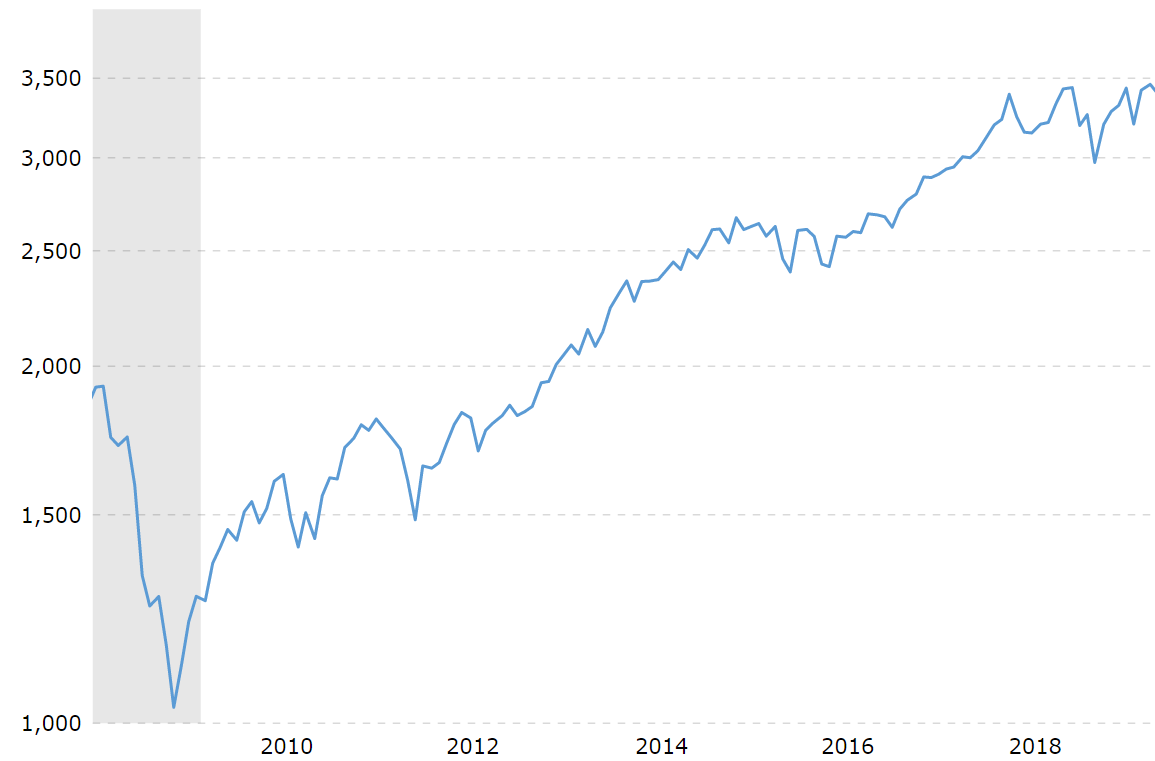
##### Not Penn State!
A confusing comparison between the two eras of opinion writing at the DP that required some investigation was the stronger significance of Penn State references in 2011-2015 over 2016-2019. After all, it seems like each generation of Penn students from our current cohort to decades before ours (through the words of current Penn professors that once were undergrads on this campus) have grappled jokingly with the similarity in our two universities' names. Why then, would 2011-2015 be any more likely to talk about the school than a later era? The sad answer is a 6 year saga of sexual assault cover-ups at Penn State that began in 2011 and culminated in 2017 with the conviction of then Penn State President Graham Spanier. In 2011, the "Sandusky Scandal" broke when a whistle-blower came forward on a case of child endangerment and assault against the head coach Jerry Sandusky following an event that occurred nearly a decade before in 2001. In the years that followed, many articles were written in the opinion section as Penn students began to digest and grapple with the national response to Sandusky and how it related to student responsibility to hold administrations accountable. 

#### 2016-2019 vs. 2011-2015

In [28]:
data_corpus_AB = calculate_keyness(bigrams_2016_2019, bigrams_2011_2015, fthreshold=5, keyness_threshold=6.6, top=100, print_table=False)
data_corpus_AB.head(20)

,item,freq,ref_freq,keyness
22,penn students,545,225,106.561062
51,climate change,90,18,45.357190
4,donald trump,95,21,43.859716
52,fossil fuel,62,8,41.977550
14,task force,74,16,34.860752
63,campus culture,49,6,34.109234
37,free speech,112,37,32.293049
82,asian american,44,6,28.887853
50,graduate students,54,11,26.798785
62,mental health,311,176,25.449981


##### The Next Era
When compared to 2011-2015, the 2016-2019 era of the opinion section began to cover what are now considered to be activism buzzwords with increased keyness. Topics including mental health, sexual misconduct, free speech, fossil fuel consumption, climate change, and advocacy for low-income students all became a much larger focus. Ranging from campus to international issue advocacy, the summation of these issues grew the rallying cry so often seen from student voices in recent years: "Penn Must ____." 

Where in the previous years had called upon Student Government to resolve student issues with more frequency, 2016-2019 saw the focus shift the burden of resolution to the administration to some extent. Whether this be due to less faith in student government in later years, to more angst against the university, to changing types of issues requiring different actors to be called on, it is clear that the administration was increasing as a focus of undergraduate criticism. As a whole, these shifts in focus were the start of a student zeitgeist surrounding "campus culture" and the "college experience."

#### 2016-2019 vs. 2020-2022

In [31]:
data_corpus_BC = calculate_keyness(bigrams_2016_2019, bigrams_2020_2022, fthreshold=5, keyness_threshold=6.6, top=100, print_table=False)
data_corpus_BC.head(20)

,item,freq,ref_freq,keyness
20,free speech,112,20,48.006979
10,task force,74,9,41.859283
28,hillary clinton,54,8,26.843784
15,affirmative action,69,15,24.418969
46,early decision,51,8,24.300517
37,campus culture,49,8,22.631299
0,feel like,148,55,22.590062
44,studying english,40,5,22.256323
8,doesn’t mean,69,17,21.092955
3,don’t want,64,15,20.796351


Continuing the characterization of 2016-2019, we see that topics including sexual violence, sexual harassment, and rape culture were more on the forefront of the time when compared to now contemporary writing in the DP opinion section. Whether this be due to controversy on campus at the time, or heightened tensions on sexual assault due to national movements, it is clear that sexual assault was a more frequently discussed issue within the Daily Pennsylvanian from 2016-2019 than where it stands today. This comes as the American Psychological Association notes the college sexual assault crisis to be a worsening phenomenon across the country with increased advocacy being witnessed at many college campuses (https://www.apa.org/monitor/2022/04/news-campus-sexual-assault). 
Perhaps the drop in writing from the DP is due to fewer cases of sexual assault on our campus (this data is not publicly available), or due to other voices on campus acting as the mouthpiece of such issues in recent years (such as the Assault and Sexual Abuse Prevention club using social media), or perhaps a collective forgetting of the importance of the issue. Regardless, it no longer seems as frequent in Opinion. 

#### 2020-2022 vs. 2016-2019 

In [32]:
data_corpus_BC = calculate_keyness(bigrams_2020_2022, bigrams_2016_2019, fthreshold=5, keyness_threshold=6.6, top=100, print_table=False)
data_corpus_BC.head(20)

,item,freq,ref_freq,keyness
52,public health,81,12,78.001270
33,west philadelphia,166,66,76.216540
103,associate professor,88,18,71.479360
54,fall semester,61,12,50.716027
4,students faculty,105,40,50.678054
61,civic engagement,63,15,46.339840
41,school district,42,5,44.293960
109,black americans,43,6,42.525001
6,penn community,234,162,40.231711
104,professor history,39,6,36.904861


Most recently, the past 3 years of DP opinion writing has shifted significantly. While the usual keyness suspects of presidents and the like pop up, as well as a focus on election day after the 2020 election, much of DP opinion has recently focused on civic engagement as a result of the COVID pandemic. Topics include engaging with West Philadelphia, an area that has nearly tripled in interest from student writers since 2016-2019, likely due to campus advocates that began campaigns for food and health supply drives in the early pandemic and have continued to stir interest in the years to come. Public policy has also increased it's hold on "the conversation" as more students have become personally aware of the effects of public policy surrounding the pandemic. Where "coming back to campus" once just meant returning from New York City internships in August or Colorado in January, 2020 brought many articles on returning to campus from a year of online education. There has been an increased emphasis on "family members" after student writers spent over a year with few other than their families, and a reinvigorated interest on the "Penn Community" has formed as students seek to redefine what such a community is in the wake of losing decades of institutional knowledge from their organizations with a very freshman upper administration.

#### Trigrams

While the years 2011-2019 have very little actionable information with their trigram analysis, interesting keyness information can be extrapolated when 2020-2022 is compared to 2016-2019 (see below).

In [33]:
data_corpus_AB = calculate_keyness(trigrams_2011_2015, trigrams_2016_2019, fthreshold=5, keyness_threshold=6.6, top=100, print_table=False)
data_corpus_AB.head(20)

,item,freq,ref_freq,keyness
1,college new york,34,8,20.073384
2,new york studying,22,7,9.746647
0,president barack obama,19,7,7.040205


In [34]:
data_corpus_AB = calculate_keyness(trigrams_2016_2019, trigrams_2011_2015, fthreshold=5, keyness_threshold=6.6, top=100, print_table=False)
data_corpus_AB.head(20)

,item,freq,ref_freq,keyness
2,new college house,34,7,16.723201
0,bois college house,24,5,11.684905
1,van den brink,19,5,7.347165


In [37]:
data_corpus_AB = calculate_keyness(trigrams_2016_2019, trigrams_2020_2022, fthreshold=5, keyness_threshold=6.6, top=100, print_table=False)
data_corpus_AB.head(20)

,item,freq,ref_freq,keyness
1,new college house,34,9,9.463017
0,vice provost university,22,5,7.415033


In [36]:
data_corpus_AB = calculate_keyness(trigrams_2020_2022, trigrams_2016_2019, fthreshold=5, keyness_threshold=6.6, top=100, print_table=False)
data_corpus_AB.head(20)

,item,freq,ref_freq,keyness
3,west philadelphia community,37,10,24.746816
4,penn leads vote,31,9,19.548656
6,penn students must,28,8,17.897348
12,school social policy,22,6,14.608585
1,students faculty staff,27,11,12.026135
13,lunar new year,24,9,11.783517
11,members penn community,38,20,11.671799
9,president donald trump,23,9,10.754158
5,payments lieu taxes,17,5,10.601431
0,black lives matter,37,21,9.917755


Interestingly, many three-word slogans have been used over the past three years where they have not been as significantly used in the past. This signals an increased sloganization on campus in public communication. 

## Topic Modeling
By performing a DTM topic modeling investigation, detailed in this folder, 15 categories of articles written by the Daily Pennsylvanian were categorized and then plotted by year to increase the temporal granularity and further generalize the results of this study. Overall, the following buckets were found to fully encompass the DP Opinion Section:

    * Cluster 1: Cultures and Race
    * Cluster 2: Freedoms and Speech
    * Cluster 3: Student Planning
    * Cluster 4: Voting Season
    * Cluster 5: Advocating Campus Reform
    * Cluster 6: COVID-19 Pandemic
    * Cluster 7: Penn's Environmental Impact
    * Cluster 8: Humor
    * Cluster 9: Personal Growth and Stories
    * Cluster 10: Mental Health
    * Cluster 11: Questioning the Ivy League
    * Cluster 12: Sexual Assault
    * Cluster 13: Fraternity Life, Cultural Houses
    * Cluster 14: Long Form Writing
    * Cluster 15: Other Interest Pieces

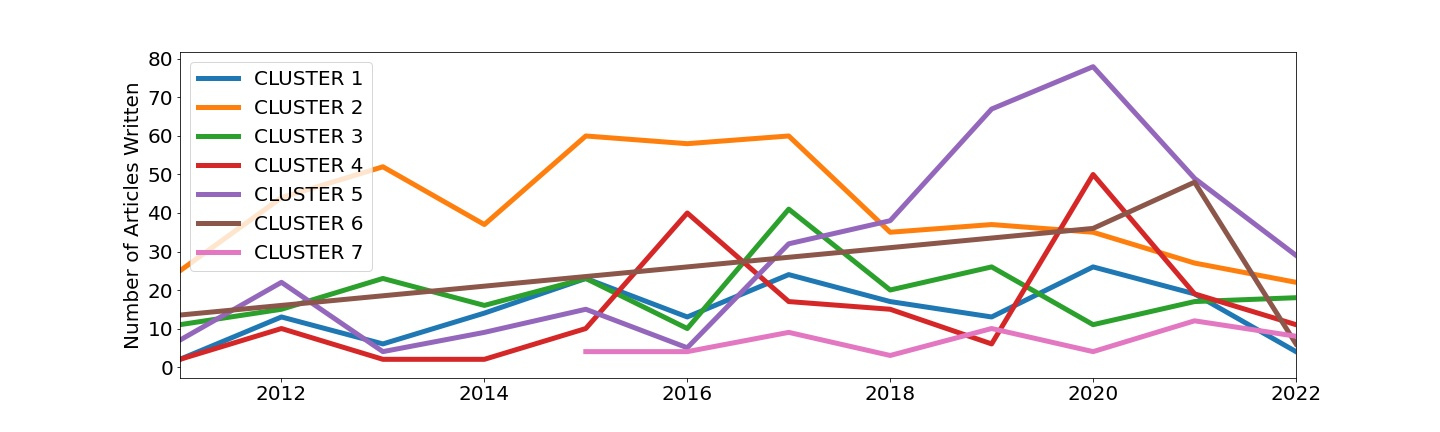

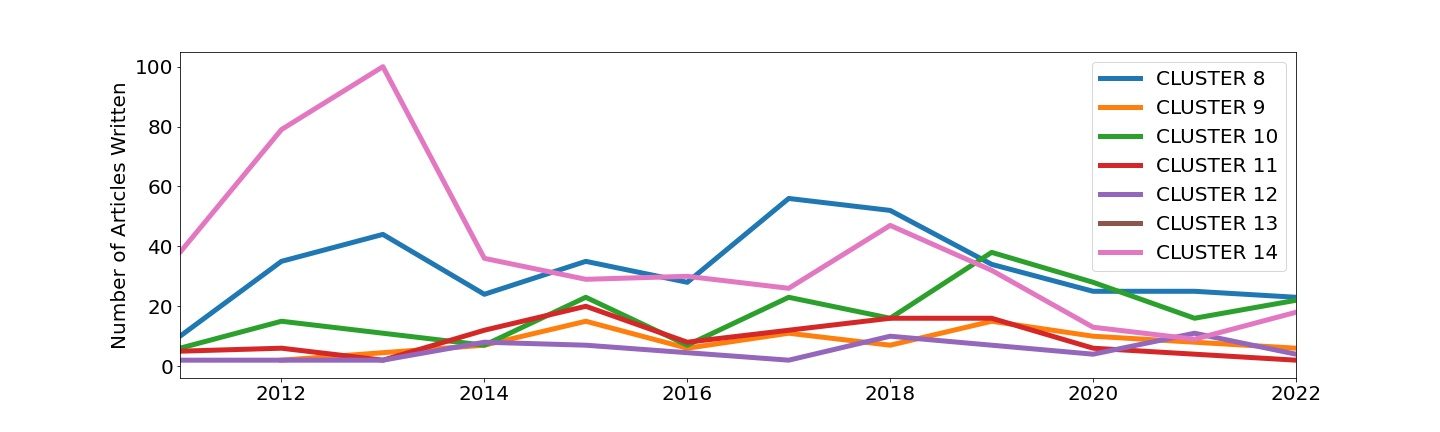

Clearly, some clusters - and therefore topics covered in the Daily Pennsylvanian - shift in coverage over time. In example, Freedom of Speech reached a peak interest in 2015-2017 during the election of Donald Trump and subsequent first year and a half of presidency. Student Planning has remained a relatively consistent topic on campus for years. Voting reaches heights in 2012, 2016, and 2020. Campus Reform grew significantly until 2020 and has since dwindled, an effort now replaced by COVID. The DP only started talking about Penn's Carbon investments in 2015. Sexual assault writing reached an apex in 2017, during a scandal with former Penn Professor Marybeth Gasman (https://www.insidehighered.com/news/2019/08/27/star-scholar-minority-serving-institutions-was-accused-fostering-hypersexualized-and) 

## Conclusion/Significance of Findings

This investigative report presupposed three hypotheses: 
* Student issues resurface in 5-year cycles
* Article topics have become increasingly diverse
* Article topics see major shifts in 2020

and has shown that indeed, student issues do have the ability to resurface over periods of time as shown in our DTM analysis, and that articles have shifted in subject over time - particularly since 2020. However, insufficient evidence has been generated to show an increased diversity of topic. The challenge is, as diversity of topic increases, the size of "bins" generated to categorize such topics shrinks given a set number of total articles written. Giving the limit of only 15 topics discussed in our DTM investigation - per instructor recommendation - a full breakdown on the number of unique topics covered in an individual year was not articulated, but a generalized statement can be made regarding the trend in diversity observed in the Daily Pennsylvanian. We have found that article topics, when employing keyness analysis to discriminate tokens, have key phrases that take hold of the student zeitgeist from year to year. In some times, the student voice will be most concerned with the environment, in others, sexual assault and campus well-being. However, accounting for yearly buzzwords, we still observe smaller topics shine through, independent of the year. The Daily Pennsylvanian Opinion Section is diverse in nature, through individual years may find significant more consideration given to the issues of the times or of the interest of the writers who investigate them. 

Regarding the hypotheses of topic shift and cyclic topics, we have found that individual events, such as controversy, new administration, pandemics, etc. can bring on continued coverage from various student writers grappling with their sense of the world as it is. This takes the form not only in explicit opinion writing, but also in self narratives on how students handle life through circumstances, i.e. how to live with your family as a junior in college when your university doesn't have dorms open, let alone classes in person. We find that such events, whether predictably occurring such as an election cycle or as spontaneous as a new university president, bring waves of student voices in droves. While observing topics dwindle in frequency of writing can be disconcerting, such as a lack in coverage on sexual assault advocacy evoking an atmosphere of forget or apathy, it must be understood that this body of text, the opinion section of the DP, seems most motivated by tangible events that shock or otherwise motivate the student body. If the DP stops writing about a topic, it's likely due its motivating circumstances ceasing, slowing, or not disclosing itself to the student body. When comparing waves of student writing interest to a collection of disadvantageous events in the university's history, it does not appear as though student voices are silenced. 

As a public record, the Daily Pennsylvanian serves as an archive of student thought through the decades from issues ranging a variety of topics and may appropriately be applied as a research resource for finding similarities to future issues. 